

# Anomaly Detection

## Table of Content

1. [Introduction to Anomaly Detection](#section1)<br>
    - 1.1 [What are anomalies?](#section101)<br>
    - 1.2 [Anomaly Detection Technique](#section102)<br>
        - 1.2.1 [Simple Statistical Methods](#section103)<br>
        - 1.2.2 [Machine Learning Based Approach](#section104)<br>
            - 1.2.2.1 [Density based](#section105)<br>
            - 1.2.2.2 [Clustering based](#section106)<br>
            - 1.2.2.3 [Support vector Machines based](#section107)<br>
2. [Use Case : Expedia](#section2)<br>
3. [Data Preprocessing](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Model Prediction](#section5)<br>
    - 5.1 [Clustering Based](#section501)<br>
    - 5.2 [Isolation Forest](#section502)<br>
    - 5.3 [One Class SVM](#section503)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
## 1. Introduction

Anomaly detection is a technique used to __identify unusual patterns__ that do not conform to expected behavior, called __outliers__. 
- It has many applications in business, from 
    - __Intrusion detection__ (identifying strange patterns in network traffic that could signal a hack).
    - System __health monitoring__ (spotting a malignant tumor in an MRI scan).
    - __Fraud detection__ in credit card transactions.
    - __Fault detection__ in operating environments.
    <img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana1.png'>

<a id=section101></a>
### 1.1 What are anomalies?

Anomalies can be broadly categorized as:<br>
1. Point anomalies
2. Contextual anmoalies
3. Collective anomalies

#### 1. Point Anamoly  
A single instance of data is anomalous if it's too far off from the rest. <br><br>__Business use case__: Detecting credit card fraud based on "amount spent."<br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana2.png'>

**2. Contextual Anomaly**<br><br>
The abnormality is context specific. This type of anomaly is common in time-series data.<br><br> 
**Business use case**: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.<br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana3.png'>

**3. Collective Anomaly**<br><br>
A set of data instances collectively helps in detecting anomalies.<br><br> 
**Business use case:** Someone is trying to copy data from a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack. <br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana4.png'>

Anomaly detection is similar to — but not entirely the same as — __noise removal__ and __novelty detection__. <br><br>
- **Novelty detection**: is concerned with identifying an unobserved pattern in new observations not included in training data — like a sudden interest in a new channel on YouTube during Christmas, for instance.`<br><br> 
- **Noise removal (NR)** is the process of immunizing analysis from the occurrence of unwanted observations; in other words, removing noise from an otherwise meaningful signal.

<a id=section102></a>
## 1.2 Anomaly Detection Techniques

<a id=section103></a>
### 1.2.1 Simple statistical methods

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common **statistical properties of a distribution**, including mean, median, mode, and quantiles.<br>
- Let's say the definition of an anomalous data point is **one that deviates by a certain standard deviation from the mean**.
- **Traversing mean** over time-series data isn't exactly trivial, as it's not static. 
- You would need a **rolling window** to compute the average across the data points. 
- Technically, this is called a **rolling average or a moving average**, and it's intended to smooth short-term fluctuations and highlight long-term ones. 
- Mathematically, an **n-period** simple moving average can also be defined as a "low pass filter."

<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana5.png'>

<a id=section104></a>
### 1.2.2 Machine Learning Based Approach

<a id=section105></a>
#### 1.2.2.1 Density based Anomaly Detection

Density-based anomaly detection is based on the __k-nearest neighbors__ algorithm.

__Assumption__: Normal data points occur around a __dense neighborhood and abnormalities are far away__. 

The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:<br>

1. __K-nearest neighbor__: k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.
2. __Relative density of data__: This is better known as __local outlier factor (LOF)__. This concept is based on a distance metric called reachability distance.<br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana6.png'>

<a id=section106></a>
#### 1.2.2.2 Clustering Based Anomaly Detection
__Clustering__ is one of the most popular concepts in the domain of __unsupervised learning__.

__Assumption__: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

__K-means__ is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that __fall outside__ of these groups could potentially be marked as anomalies.<br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana.png'>

<a id=section107></a>
#### 1.2.2.3 Support Vector Machine Based Anomaly Detection
A support vector machine is another effective technique for detecting anomalies. 
- A SVM is typically associated with __supervised learning__, but there are _extensions (OneClassSVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled)_. 
- The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it **tunes itself to identify the abnormalities** that fall outside the learned region.<br>

Depending on the use case, the output of an anomaly detector could be __numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels)__.<br>
<img src = 'https://raw.githubusercontent.com/insaid2018/Term-4/master/images/anamoli_images/ana7.png'>

<a id=section2></a>
### 2. Use Case: Expedia

- One of the **largest online travel** agency and powers search results fo **millions of travel shoppers** every day.
- "Hotel" refers to hotels, apartments, B&Bs, hostels and other properties.
- Room types are not distinguished and the **data can be assumed to apply to the least expensive room type**.
- Most of the data are for searches that **resulted in a purchase**, but a small proportion are for **searches not leading to purchase.**

| Column Name | Data Type | Description |
| ------------ | --------- | ----------- |
| date_time | Data/time | Date and time of the search |
| price_usd | Float | Displayed price of the hotel for the given search |
| srch_booking_window | Integer | Number of days on the future the hotel stay started fromt he search done|
| srch_staurday_night_bool | Boolean | +1 if the stay includes a Saturday night |

### Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Reading the data from github source

In [8]:
#df = pd.read_csv('https://raw.githubusercontent.com/amity1415/eKeeda/main/Rawdata/train.csv')
df= pd.read_csv('train.csv')
df.sample(5)

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2605,2012-12-17 01:44:43,238.0,14,0
1894,2013-06-04 00:08:14,130.0,24,1
2449,2012-11-28 20:24:05,80.0,3,1
647,2013-04-23 15:30:38,174.0,9,1
2534,2013-01-10 15:14:16,99.0,15,1


<a id=section3></a>
### 3. Data Exploration and preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 3049 non-null   object 
 1   price_usd                 3049 non-null   float64
 2   srch_booking_window       3049 non-null   int64  
 3   srch_saturday_night_bool  3049 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 95.4+ KB


In [10]:
df['price_usd'].describe()

count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

<AxesSubplot:ylabel='Density'>

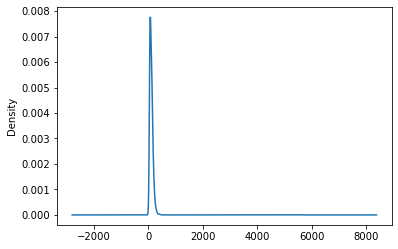

In [11]:
df['price_usd'].plot(kind='kde')

#### Observation
- Here, we have detected one extreme anomaly which was the **Max price_usd at 5584**.

- If an individual data instance can be considered as anomalous w.r.t the rest of the data, we call it **Point Anomalies**. 
- We could go back to check the log to see what was it about.
- It was either a **mistake or user searched a presidential suite by accident** and had no intention to book or view. 

In [12]:
df.loc[(df['price_usd']==5584)]

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
932,2013-04-07 20:59:07,5584.0,13,0


In [13]:
 df = df.loc[df['price_usd']<537]
df.describe()

,price_usd,srch_booking_window,srch_saturday_night_bool
count,3048.000000,3048.000000,3048.000000
mean,111.144055,37.090551,0.524606
std,55.055161,46.165784,0.499476
min,0.120000,0.000000,0.000000
25%,67.000000,6.000000,0.000000
50%,100.000000,20.000000,1.000000
75%,141.000000,48.000000,1.000000
max,536.000000,292.000000,1.000000


#### Observation:
- We need to understand what room type a user searched for.
- The price for a standard room could be very different with the price for a King bed room with Ocean View.

<a id=section4></a>
## 4. Exploratory Data Analysis

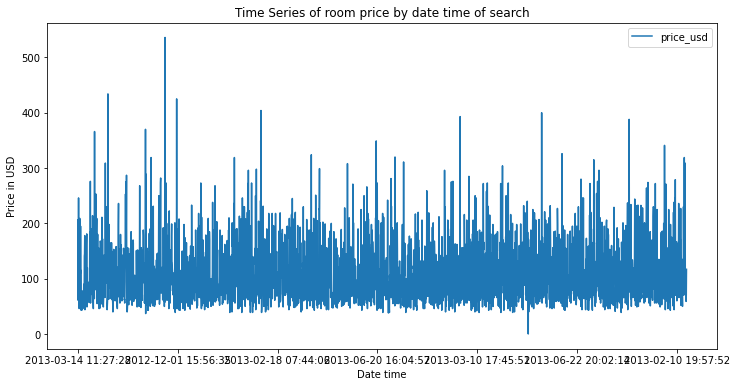

In [14]:
df.plot(x='date_time',y='price_usd', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search');

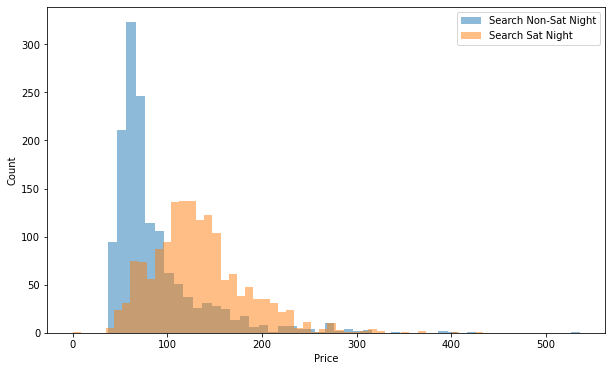

In [15]:
a= df.loc[df['srch_saturday_night_bool']==0, 'price_usd']
b= df.loc[df['srch_saturday_night_bool']==1, 'price_usd']
plt.figure(figsize=(10,6))
plt.hist(a,bins=50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins=50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show();

#### Observation:
- The price is more stable and lower when searching Non-Saturday night. 
- The price goes up when searching Saturday night. Seems this property gets popular during the weekend.

<a id=section5></a>
### 5. Model Prediction

<a id=section501></a>
### 5.1 Clustering based Anomaly Detection
#### k-means algorithm

In [16]:
dat = df[['price_usd', 'srch_booking_window','srch_saturday_night_bool']]
n_cluster= range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(dat) for i in n_cluster]
scores = [kmeans[i].score(dat) for i in range(len(kmeans))]

### Visualize the elbow curve

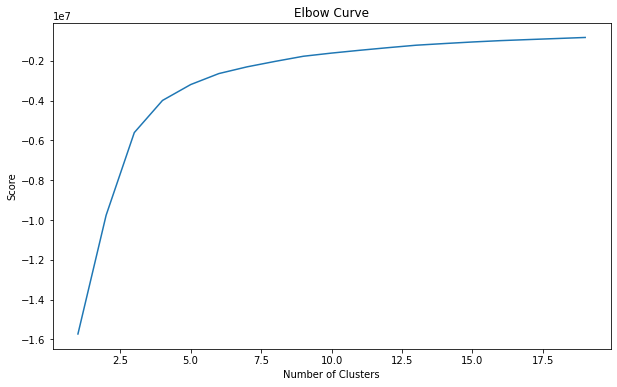

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

#### Observation:
- We see the graph levels off after 11 clusters.
- This means that addition of more clusters do not explain much more of the variance in our relevant variable; in this case price_usd.

**Setting n_clusters=11, and upon generating the k-means output use the data to plot the 3D clusters.**

In [18]:
X= df[['price_usd','srch_booking_window','srch_saturday_night_bool']]
X= X.reset_index(drop=True)
km= KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels= km.labels_
labels

array([2, 2, 0, ..., 0, 1, 3])

### 3D Visualization between price_usd, srch_booking_window and srch_saturday_night_bool.

Text(0.5, 0.92, 'K Means')

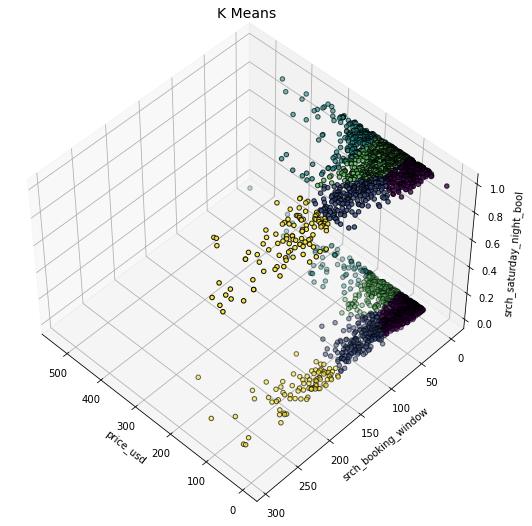

In [19]:
fig= plt.figure(1, figsize=(7,7))
ax= Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14)

#### Standardization

In [20]:
# Perform standardization of the Independent Variables
dt= df[['price_usd', 'srch_booking_window','srch_saturday_night_bool']]
X = dt.values
X

array([[206.,  99.,   1.],
       [186.,   6.,   0.],
       [ 61.,   1.,   0.],
       ...,
       [ 59.,  33.,   0.],
       [ 71.,  59.,   0.],
       [117.,  47.,   1.]])

In [21]:
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
print(X_std)
print(mean_vec)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('-----------')
print(eig_vals)
print('-----------')
print(eig_vecs)

[[ 1.72320828  1.34124457  0.95194084]
 [ 1.35987664 -0.67356492 -1.05048544]
 [-0.91094608 -0.78188801 -1.05048544]
 ...
 [-0.94727924 -0.08862023 -1.05048544]
 [-0.72928026  0.47465984 -1.05048544]
 [ 0.1063825   0.21468442  0.95194084]]
[ 3.63663605e-16 -3.26364774e-17  9.67438436e-17]
-----------
[0.58031429 1.41350081 1.00716948]
-----------
[[-0.70329412 -0.70906231 -0.0510688 ]
 [-0.14526912  0.07302271  0.98669376]
 [ 0.69589817 -0.70135463  0.1543613 ]]


In [22]:
len(eig_vals)

3

In [23]:
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [24]:
tot = sum(eig_vals)

In [25]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual Variance Explained
cum_var_exp= np.cumsum(var_exp) # Cumulative Variance Explained.

In [26]:
print(var_exp)
print(cum_var_exp)

[47.10123543106117, 33.56130143731031, 19.33746313162852]
[ 47.10123543  80.66253687 100.        ]


### Visualizing the variance explained by each components

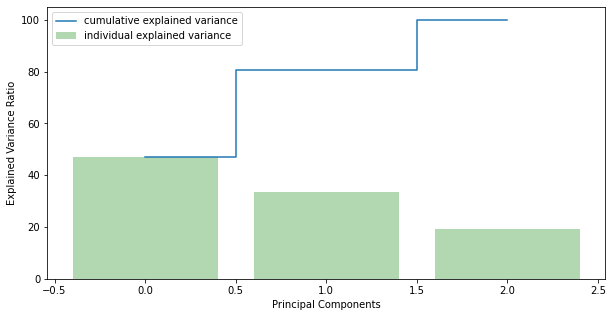

In [27]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, alpha=.3, align='center',label='individual explained variance', color='g' )
plt.step(range(len(var_exp)),cum_var_exp, where='mid' , label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

#### Observation
- First component explains almost 50% of the variance. 
- Second component explains over 30%.
- Notice that almost none of the components are really negligible. 
- The first 2 components contain over 80% of the information. So, we will set n_components=2.

#### Assumptions
- If we cluster the data, normal data will belong to clusters while **anomalies will not belong to any clusters** or belong to small clusters. 
- We use the following steps to find and visualize anomalies.

#### Steps
- Calculate the distance between **each point and its nearest centroid**. The biggest distances are considered as anomaly.
- We use **outliers_fraction** to provide information to the algorithm about the proportion of the outliers present in our data set.
- Calculate **number_of_outliers** using outliers_fraction.
- Set threshold as the **minimum distance** of these outliers.
- The anomaly result of anomaly1 contains the above **method Cluster (0:normal, 1:anomaly).**
- Visualize anomalies with Time Series view.

### Resetting the index to make the data ordered.

In [28]:
dat.reset_index(drop=True, inplace=True)
display(dat)

,price_usd,srch_booking_window,srch_saturday_night_bool
0,206.0,99,1
1,186.0,6,0
2,61.0,1,0
3,72.0,116,0
4,246.0,245,0
...,...,...,...
3043,107.0,30,1
3044,81.0,73,0
3045,59.0,33,0
3046,71.0,59,0


#### Creating user-defined function to find the distance

In [29]:
def getDistanceByPoint(dt, model):
    distance= pd.Series()
    for i in range(0, len(dt)):
        Xa = np.array(dt.loc[i])  #array([61., 1., 0.])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance= distance.append(pd.Series(np.linalg.norm(Xa-Xb)), ignore_index= True)
    return distance

#### Defining outlier fraction and calculating distance

In [30]:
outliers_fraction = 0.01
#get the distaice between each point and its nearest centroid. The biggest distances are considered anomaly.
distance = getDistanceByPoint(dat, kmeans[5])
print(distance)

0       113.590154
1       117.772847
2       130.303711
3       243.830774
4       254.719750
           ...    
3043     43.289235
3044    220.943471
3045    131.298425
3046    227.597085
3047     59.513815
Length: 3048, dtype: float64


In [34]:
number_of_outliers = int(outliers_fraction* len(distance))
number_of_outliers

30

In [40]:
threshold= distance.nlargest(number_of_outliers).min()
threshold

260.80111136705574

In [42]:
# Whereever the distance is greater than threshold, mark it as 1, else 0;
(distance>=threshold).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
3043    0
3044    0
3045    0
3046    0
3047    0
Length: 3048, dtype: int32

#### Calculating the no. of outliers and threshold

In [44]:
number_of_outliers= int(outliers_fraction*len(distance))
threshold= distance.nlargest(number_of_outliers).min()
# anomaly contain the anomaly result of the above method Cluster( 0: Normal, 1: Anomaly)
df['anomaly']= (distance>= threshold).astype(int)


In [46]:
df[:5]

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,anomaly
0,2013-03-14 11:27:28,206.0,99,1,0.0
1,2013-01-03 20:48:24,186.0,6,0,0.0
2,2013-01-19 16:51:27,61.0,1,0,0.0
3,2013-01-26 11:34:23,72.0,116,0,0.0
4,2013-04-29 09:39:50,246.0,245,0,0.0


In [48]:
df = df.sort_values('date_time')
a= df.loc[df['anomaly']==1, ['date_time','price_usd']] # anomaly records

In [49]:
a.head()

,date_time,price_usd
2322,2012-12-17 13:52:50,58.0
1494,2012-12-18 16:36:28,84.0
1914,2012-12-22 21:07:12,59.0
2609,2012-12-28 22:00:31,136.0
495,2012-12-31 08:25:26,425.0


#### Variation of 'Price_USD' with 'date_time'

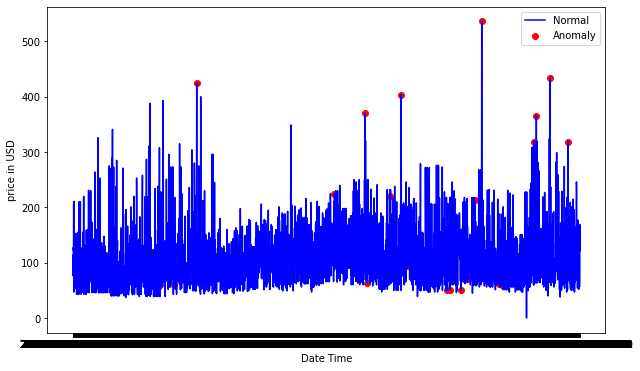

In [50]:
fig, ax = plt.subplots(figsize= (10,6))
ax.plot(df['date_time'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time'],a['price_usd'], color='red', label='Anomaly')
plt.xlabel('Date Time')
plt.ylabel('price in USD')
plt.legend()
plt.show();

<a id=section502></a>
### 5.2 Isolation Forest for Anomaly Detection  [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)                                                                     

- They detects anomalies purely based on the fact that anomalies are data points that are different and few.
- It has been implemented without employing any distance or density measure.

In [53]:
data= df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled =scaler.fit_transform(data)
data= pd.DataFrame(np_scaled)

#### Training Isolation model

In [54]:
model_I = IsolationForest(contamination= outliers_fraction)
model_I.fit(data)

IsolationForest(contamination=0.01)

In [56]:
df['anomaly2']= pd.Series(model_I.predict(data))

In [57]:
df['anomaly2'].value_counts()

 1.0    3016
-1.0      31
Name: anomaly2, dtype: int64

#### Variation of 'Price_USD' with 'date_time'

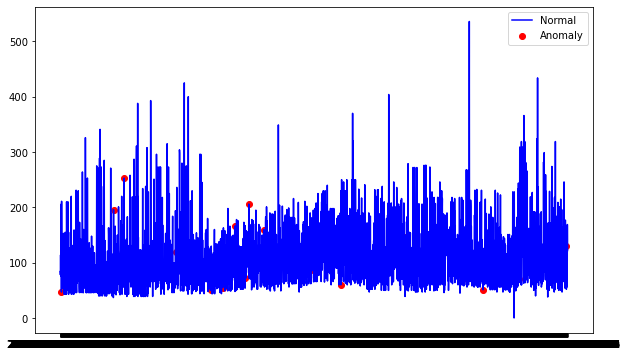

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
a= df.loc[df['anomaly2']== -1, ['date_time','price_usd']] #anomaly

ax.plot(df['date_time'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time'],a['price_usd'], color='red', label='Anomaly')
plt.legend()
plt.show()

<a id=section503></a>
### 5.3 Support Vector Machines-Based Anomaly Detection: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)

In [64]:
data1= df[['price_usd','srch_booking_window','srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled= scaler.fit_transform(data1)
data= pd.DataFrame(np_scaled)


#### Training oneclassSVM

In [65]:
model = svm.OneClassSVM(nu= outliers_fraction , kernel='rbf', gamma=0.01)
model.fit(data)
df['anomaly3'] = pd.Series(model.predict(data))

#### Variation of 'Price_USD' with 'date_time'

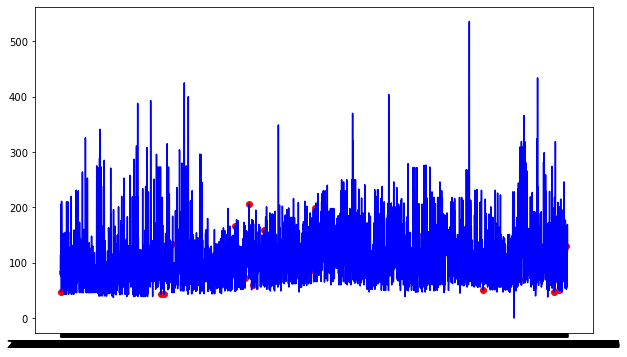

In [66]:
fig, ax= plt.subplots(figsize=(10,6))
a= df.loc[df['anomaly3']==-1, ['date_time','price_usd']] #Anomaly
ax.plot(df['date_time'],df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time'], a['price_usd'], color='red', label='Anomaly')
plt.show()
             

<a id=section6></a>
### 6. Conclusion

- We applied 3 different methods.
- Since anomaly is unsupervised, the results of these methods needs to be tested in the industry to place them in critical path.